## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

#save input and output as a .npz or numpy file
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

##### Epoch- iteration over full data set

In [3]:
training_data= np.load('TF_intro.npz')


In [4]:
input_size=2
output_size=1

#tf.keras.Sequential- function that specifies how the model will be laid down.
#output= np.dot(input,weights)+ bias
#tf.keras.layers.Dense(output size)- takes input provided to the model and calculates dot product of input 
#and weights and adds bias *also applies activation function(optional)

model=tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                          ])
#model.compile(optimizer, loss)- configures the model for training
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses

model.compile(optimizer= 'SGD', loss= 'mean_squared_error')

#model.fit(inputs, targets)- fits(trains) model
#verbose =0, stands for 'silent' or no output about training is displayed 
#verbose= 1, stands for 'progress bar'
#verbose= 2, stands for 'one line per epoch'
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)



Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 34.4490
Epoch 2/100
1000/1000 - 0s - loss: 4.2746
Epoch 3/100
1000/1000 - 0s - loss: 1.4353
Epoch 4/100
1000/1000 - 0s - loss: 0.6550
Epoch 5/100
1000/1000 - 0s - loss: 0.4382
Epoch 6/100
1000/1000 - 0s - loss: 0.3789
Epoch 7/100
1000/1000 - 0s - loss: 0.3675
Epoch 8/100
1000/1000 - 0s - loss: 0.3599
Epoch 9/100
1000/1000 - 0s - loss: 0.3560
Epoch 10/100
1000/1000 - 0s - loss: 0.3613
Epoch 11/100
1000/1000 - 0s - loss: 0.3640
Epoch 12/100
1000/1000 - 0s - loss: 0.3582
Epoch 13/100
1000/1000 - 0s - loss: 0.3666
Epoch 14/100
1000/1000 - 0s - loss: 0.3639
Epoch 15/100
1000/1000 - 0s - loss: 0.3570
Epoch 16/100
1000/1000 - 0s - loss: 0.3572
Epoch 17/100
1000/1000 - 0s - loss: 0.3577
Epoch 18/100
1000/1000 - 0s - loss: 0.3587
Epoch 19/100
1000/1000 - 0s - loss: 0.3647
Epoch 20/100
1000/1000 - 0s - loss: 0.3544
Epoch 21/100
1000/1000 - 0s - loss: 0.3614
Epoch 22/100
1000/1000 - 0s - loss: 0.3543
Epoch 23/100
1000/1000 - 0s - loss: 0.35

## Extract weights and biases

#### Target Function: $$2*xs - 3*zs + 5 $$

In [5]:
model.layers[0].get_weights()

[array([[ 1.9851482],
        [-3.0114183]], dtype=float32), array([5.009789], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9851482],
       [-3.0114183]], dtype=float32)

In [7]:
bias=model.layers[0].get_weights()[1]
bias

array([5.009789], dtype=float32)

## Extract the outputs (to make predictions)


In [8]:
#model.predict_on_batch(data)- calculates the output given inputs
#in TF2.0 use .numpy().round(digit_after_decimal)
#these values are used against the targer to compute the loss function
model.predict_on_batch(training_data['inputs']).numpy().round(1)


array([[-13.6],
       [ 16.8],
       [ 13.7],
       [ -3.6],
       [  7.8],
       [-17.3],
       [  4.7],
       [ 19. ],
       [-12. ],
       [  5.8],
       [ 28.8],
       [ -8.4],
       [-38.1],
       [  3.3],
       [ 21.8],
       [  3.2],
       [ -1.5],
       [ -9.6],
       [  5.1],
       [  3.4],
       [ 40.1],
       [ -3.1],
       [ 38.1],
       [ 29.1],
       [-10.1],
       [ 21.6],
       [ 11.6],
       [ -4.7],
       [-26.9],
       [-14.7],
       [-22.1],
       [ 41.7],
       [ -4. ],
       [ -6.1],
       [ 43.3],
       [ -2.9],
       [ 19.1],
       [ 34.4],
       [ 40.4],
       [ 14.5],
       [-28.4],
       [ -5.1],
       [ 36.4],
       [ -5.1],
       [  7.4],
       [ 24.2],
       [  2.1],
       [ 51.1],
       [ -9.8],
       [  7.8],
       [  6.7],
       [ 21.9],
       [ 10.2],
       [ 14.5],
       [ 22.6],
       [ 10.2],
       [ 32.5],
       [ -8.4],
       [ 11.3],
       [ 39.4],
       [ 13.8],
       [-30.3],
       [

In [9]:
(training_data['targets']).round(1)


array([[-12.7],
       [ 17.1],
       [ 13. ],
       [ -3.1],
       [  8.3],
       [-18.3],
       [  5.4],
       [ 19.3],
       [-12.6],
       [  6. ],
       [ 28. ],
       [ -7.8],
       [-37.4],
       [  2.6],
       [ 22.4],
       [  4. ],
       [ -2.4],
       [ -8.8],
       [  5.6],
       [  3.2],
       [ 39.8],
       [ -3.8],
       [ 38.8],
       [ 29.4],
       [-10.7],
       [ 20.7],
       [ 11.9],
       [ -4.6],
       [-26.4],
       [-13.9],
       [-23.2],
       [ 41.3],
       [ -3.8],
       [ -5.4],
       [ 43.3],
       [ -3.4],
       [ 19.5],
       [ 34.7],
       [ 40.6],
       [ 15.3],
       [-29.3],
       [ -6.2],
       [ 36.4],
       [ -5. ],
       [  7.5],
       [ 25. ],
       [  3.1],
       [ 50.3],
       [ -9.5],
       [  7. ],
       [  6.4],
       [ 21.1],
       [  9.7],
       [ 14.2],
       [ 22.8],
       [ 10. ],
       [ 33.1],
       [ -8.1],
       [ 10.6],
       [ 39. ],
       [ 13.2],
       [-30.4],
       [

## Plotting the data

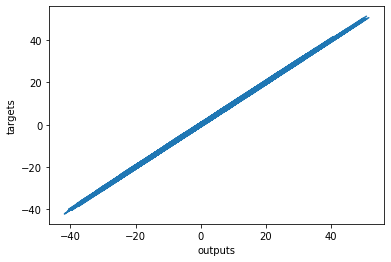

In [12]:
# np.squeeze the arrays in order to fit them to what the plot function expects.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
#the 45 degree line shows the relation between output and target, here its perfect
# TensorFlow becomes more useful when the complexity of the model increases